# Session 2: homework

## The Federalist papers

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
import statsmodels.api as sm
import math

- Load the Federalist papers dataset (`datasets/federalist/federalist-papers.csv`) into a dataframe.
- Because the CSV has an existing index, use the parameter `index_col=0`

In [2]:
df = pd.read_csv("../datasets/federalist/federalist-papers.csv", index_col=0)
df = df.reset_index(drop=True)
df

,000,1,10,100,104,105,109,11,114,115,...,young,your,yourself,yourselves,zaleucus,zeal,zealand,zealous,zelden,AUTHOR
0,0,2,0,0,0,0,0,0,0,0,...,0,10,0,0,0,3,0,0,0,HAMILTON
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,JAY
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,JAY
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,JAY
4,0,0,0,0,0,0,0,0,0,0,...,1,3,0,1,0,0,0,0,0,JAY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102,4,0,0,7,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,MADISON
103,0,0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,MADISON
104,0,2,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,MADISON
105,0,5,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,MADISON


- The final column in this data has an "AUTHOR" label for each document. Store this column in a separate vector (called `auth`) and remove the author column from the data.
> NOTE: The column name is case-sensitive!

In [3]:
auth = df["AUTHOR"]
df = df.drop("AUTHOR", axis=1)
df

,000,1,10,100,104,105,109,11,114,115,...,you,young,your,yourself,yourselves,zaleucus,zeal,zealand,zealous,zelden
0,0,2,0,0,0,0,0,0,0,0,...,7,0,10,0,0,0,3,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,1,1,3,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102,4,0,0,7,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
103,0,0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
104,0,2,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
105,0,5,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


- This data is structured as a "bag of words" model: row = 1 document, column = 1 word, cell = absolute frequency of 1 word in 1 document. 

- Read the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.Normalizer.html#sklearn.preprocessing.Normalizer) for the `sklearn.preprocessing.Normalizer`
- import the `Normalizer` module and use the `fit_transform()` method to apply "L1 normalization" to the dataframe.
- This will produce a numpy `ndarray`. Save it as a new variable.
- Now create a new pandas dataframe from this, and set the `columns=` parameter using the `columns` property from the original dataframe.

In [4]:
from sklearn.preprocessing import Normalizer

In [5]:
ary = Normalizer(norm="l1").fit_transform(df)
norm_df = pd.DataFrame(ary, columns=df.columns)
norm_df

,000,1,10,100,104,105,109,11,114,115,...,you,young,your,yourself,yourselves,zaleucus,zeal,zealand,zealous,zelden
0,0.00000,0.001233,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.004316,0.000000,0.006165,0.0,0.000000,0.0,0.001850,0.0,0.0,0.0
1,0.00000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0
2,0.00000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0
3,0.00000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.000608,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0
4,0.00000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.000742,0.000742,0.002226,0.0,0.000742,0.0,0.000000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102,0.00111,0.000000,0.000000,0.001943,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.000278,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0
103,0.00000,0.000000,0.000789,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0
104,0.00000,0.000723,0.000000,0.000000,0.0,0.0,0.000361,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0
105,0.00000,0.001762,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0


- Inspect the distribution of the resulting relative frequencies for the following words (across the entire dataset):
    - of
    - is
    - upon

- Plot for each of these words a histogram of the column values and overlay that with a red density curse. Which of these "seems" normally distributed?

> TIP: you might find the argument `cut=0` useful


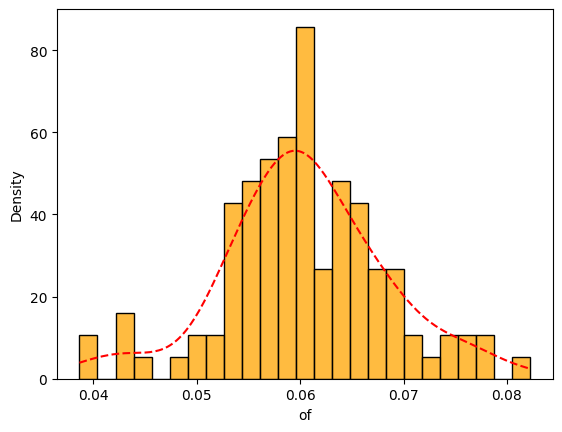

In [6]:
sns.histplot(
    norm_df,
    x="of",
    color="orange",
    stat="density",
    bins=25,
)
sns.kdeplot(norm_df, x="of", color="red", linestyle="--", cut=0)
plt.show()

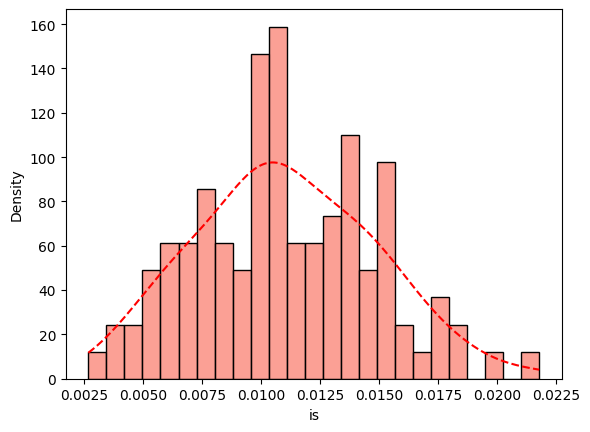

In [7]:
sns.histplot(
    norm_df,
    x="is",
    color="salmon",
    stat="density",
    bins=25,
)
sns.kdeplot(norm_df, x="is", color="red", linestyle="--", cut=0)
plt.show()

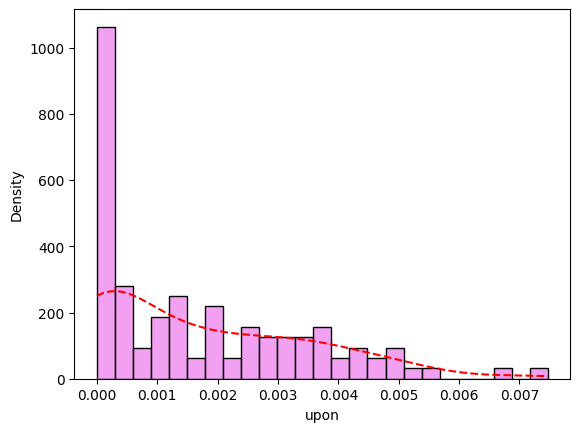

In [8]:
sns.histplot(
    norm_df,
    x="upon",
    color="violet",
    stat="density",
    bins=25,
)
sns.kdeplot(norm_df, x="upon", color="red", linestyle="--", cut=0)
plt.show()

- Verify your intuitions either by applying a Shapiro-Wilk test, or by using a QQ plot (or both)

Shapiro-Wilk for of: ShapiroResult(statistic=np.float64(0.9809169073672337), pvalue=np.float64(0.12750081056445975))


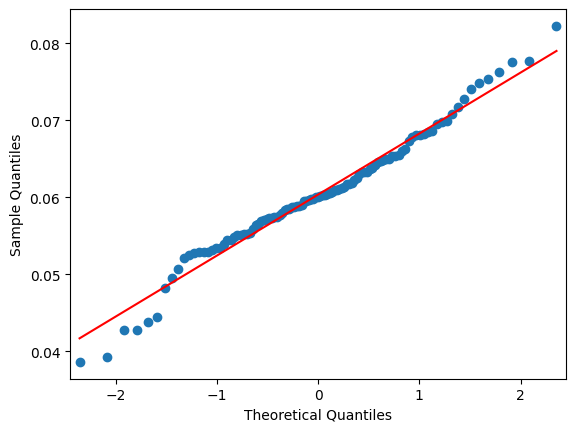

Shapiro-Wilk for is: ShapiroResult(statistic=np.float64(0.9928382723136675), pvalue=np.float64(0.8517284585285784))


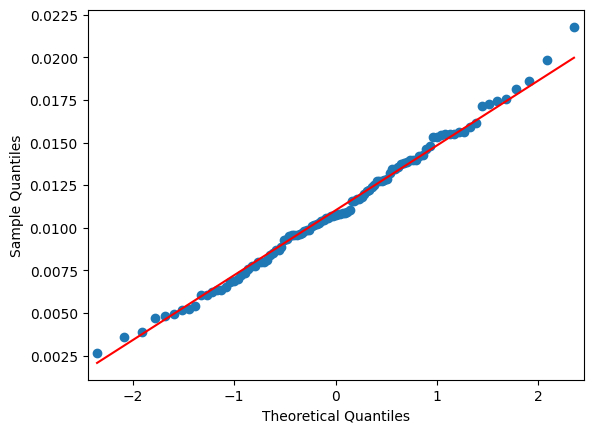

Shapiro-Wilk for upon: ShapiroResult(statistic=np.float64(0.872414241326929), pvalue=np.float64(3.9642190062462935e-08))


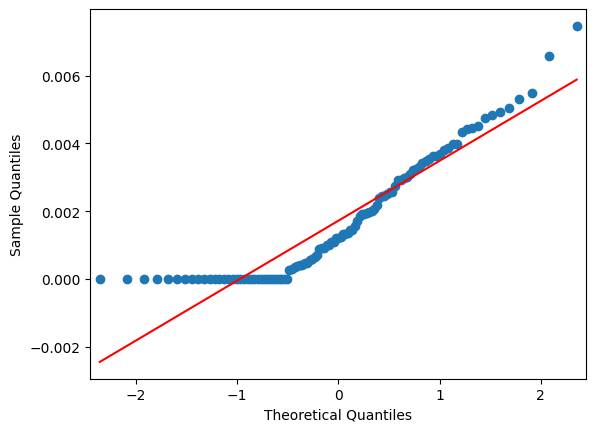

In [9]:
for word in ["of", "is", "upon"]:
    print(f"Shapiro-Wilk for {word}: {sp.stats.shapiro(norm_df[word])}")
    sm.qqplot(norm_df[word], line="s")
    plt.show()

- Hamilton and Madison, the two primary authors in the dataset, are said to use the word "upon" in very different ways. Extract the relative frequencies of these words for each author in a separate vector. Produce a boxplot to compare the distribution of these two authors.

> TIP: this may be a little difficult. Google is your friend.

upon    Axes(0.125,0.11;0.775x0.77)
dtype: object

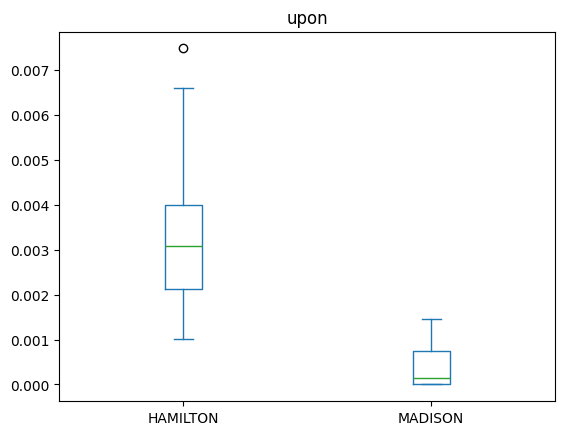

In [10]:
tmp = pd.concat([norm_df, auth], axis=1)
tmp[tmp.AUTHOR.isin(["MADISON", "HAMILTON"])].plot.box(by="AUTHOR", column=["upon"])

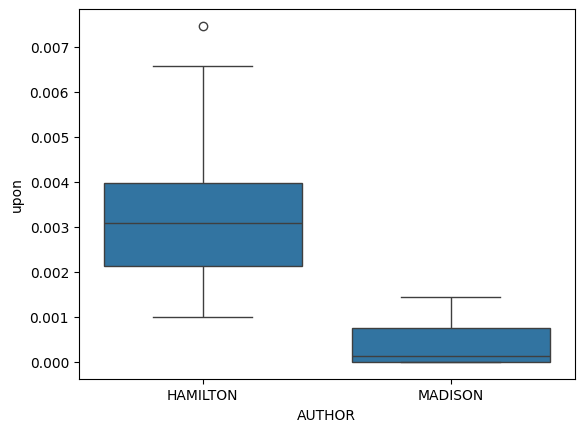

In [11]:
sns.boxplot(y=norm_df["upon"], x=auth[auth.isin(["MADISON", "HAMILTON"])])
plt.show()

- Define a concrete hypothesis regarding a potential difference in "upon" usage between these two authors. Make sure that you make a conscious choice about the test's directionality. 

In [12]:
# define hypothesis

Now is the time for a two-sample Kolmogorov-Smirnov test. Read the [documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ks_2samp.html), define the appropriate hypothesis, and run the test. Describe how you interpret the result of the test.

> TIP: In particular, read this part carefully!
>
>Note that the alternative hypotheses describe the CDFs of the underlying distributions, not the observed values of the data. For example, suppose x1 ~ F and x2 ~ G. If F(x) > G(x) for all x, the values in x1 tend to be less than those in x2.

In [13]:
mad = norm_df["upon"][auth == "MADISON"]
ham = norm_df["upon"][auth == "HAMILTON"]
sp.stats.ks_2samp(ham, mad, alternative="less")

KstestResult(statistic=np.float64(0.9411764705882353), pvalue=np.float64(3.323093089739529e-21), statistic_location=np.float64(0.001445086705202312), statistic_sign=np.int8(-1))

> SOLUTION: Did the documentation make sense to you? Since the Hamilton **observations** tend to be greater (they are more to the right on the number line) the Hamilton **CDF** will tend to be *less* since the probability mass 'starts later'. Here is a visualisation that might help...

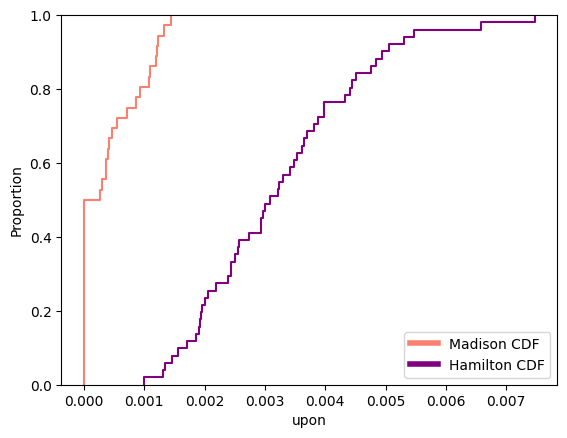

In [14]:
from matplotlib.lines import Line2D

ax = sns.ecdfplot(mad, color="salmon")
sns.ecdfplot(ham, color="purple")
ax.legend(
    [
        Line2D([0], [0], color="salmon", lw=4),
        Line2D([0], [0], color="purple", lw=4),
    ],
    ["Madison CDF", "Hamilton CDF"],
)
sns.move_legend(ax, "lower right")
plt.show()

- Run a suitable test to assess whether the central tendency in the two "upon" samples is (in)significantly different. Are you allowed to run a $t$-test to compare the means? Run tests to make your case.

In [15]:
print(f"Shapiro-Wilk for Madison: {sp.stats.shapiro(mad)}")
print(f"Shapiro-Wilk for Hamilton: {sp.stats.shapiro(ham)}")

Shapiro-Wilk for Madison: ShapiroResult(statistic=np.float64(0.7802755049523858), pvalue=np.float64(6.764469082518722e-06))
Shapiro-Wilk for Hamilton: ShapiroResult(statistic=np.float64(0.9580578329077492), pvalue=np.float64(0.06894010905041588))


> SOLUTION: Since the Madison data is not normally distributed, we should not proceed with a $t$-test. In this case we don't need to check variances, and go directly to Mann-Whitney U. Note carefully the difference in $H_1$! Here we run the test saying "compare the observations of Hamilton to Madison. $H_0$ is that they are the same, $H_1$ is that Hamilton observations are stochastically greater"

In [16]:
sp.stats.mannwhitneyu(ham, mad, alternative="greater")

MannwhitneyuResult(statistic=np.float64(1826.0), pvalue=np.float64(1.9875327674963804e-15))

- Repeat all the previous steps to compare our two authors' usage of the word "is": which test is most appropriate to assess the difference in central tendency across both samples?

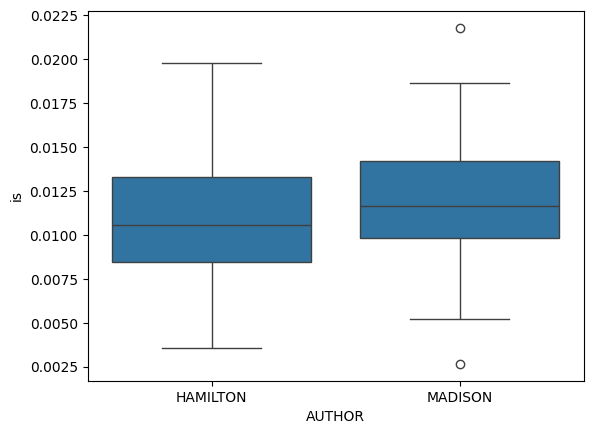

In [17]:
sns.boxplot(y=norm_df["is"], x=auth[auth.isin(["MADISON", "HAMILTON"])])
plt.show()

In [18]:
mad = norm_df["is"][auth == "MADISON"]
ham = norm_df["is"][auth == "HAMILTON"]
sp.stats.ks_2samp(mad, ham, alternative="two-sided")

KstestResult(statistic=np.float64(0.22549019607843138), pvalue=np.float64(0.19629758325527186), statistic_location=np.float64(0.009523809523809525), statistic_sign=np.int8(-1))

In [19]:
print(f"Shapiro-Wilk for Madison: {sp.stats.shapiro(mad)}")
print(f"Shapiro-Wilk for Hamilton: {sp.stats.shapiro(ham)}")

Shapiro-Wilk for Madison: ShapiroResult(statistic=np.float64(0.9863893867994092), pvalue=np.float64(0.9285245979358787))
Shapiro-Wilk for Hamilton: ShapiroResult(statistic=np.float64(0.9867192143810111), pvalue=np.float64(0.8343752653985591))


In [20]:
ratio = mad.std() ** 2 / ham.std() ** 2
df_mad = mad.size - 1
df_ham = ham.size - 1
(1 - sp.stats.f.cdf(ratio, df_mad, df_ham)) * 2

np.float64(0.6382638145978135)

> SOLUTION: Normality tests are good and the F-test gives no basis to reject $H_0$ that variance is equal. The data is not paired. We should use an independent sample $t$-test.

In [21]:
sp.stats.ttest_ind(mad, ham, equal_var=True)

TtestResult(statistic=np.float64(1.2389789783402732), pvalue=np.float64(0.21876367672328123), df=np.float64(85.0))

> SOLUTION: We cannot reject $H_0$, and conclude that the means are not significantly different.

## Translation as a treatment?

In the block below, we load a dataset from Gries's text book:

In [22]:
df = pd.read_csv(
    "../datasets/gries/04-3-2-2_textlengths.csv", sep="\t", index_col="CASE"
)
df.head(3)

,LENGTH,TEXT,TEXTSOURCE,LANGUAGE
CASE,,,,
1,1501,1,Original,English
2,1499,2,Original,English
3,1501,3,Original,English


In [23]:
translat = df.pivot(index="TEXT", columns="TEXTSOURCE", values="LENGTH")
translat

TEXTSOURCE,Original,Translation
TEXT,,
1,1501,1585
2,1499,1467
3,1501,1538
4,1498,1441
5,1499,1364
6,1499,1321
7,1498,1299
8,1500,1550
9,1499,1682


This dataset was obtained from the following study: 
> Frankenberg-Garcia, Ana (2004), 'Are translations longer than source texts? A corpus-based study of explicitation'. Paper presented at Third International CULT (Corpus Use and Learning to Translate) Conference, Barcelona, 22–24. January 2004.

It features the length of 16 texts (which were controlled in size) that were translated to another language (half of the texts were translated from English to Portuguese, half the other way round).

- Make a boxplot of the data, comparing the lengths of the texts in both categories. What do you observe? Is this a good visualization?

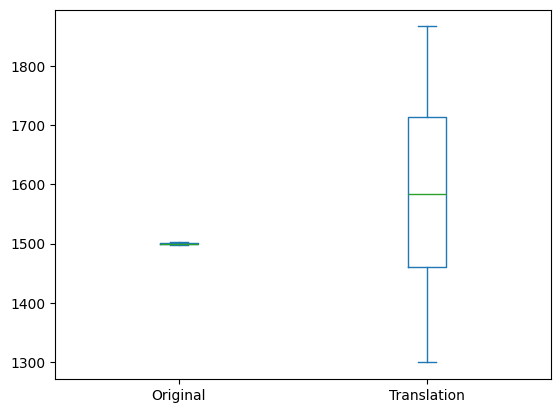

In [24]:
translat.plot.box()
plt.show()

> SOLUTION: The boxplot is not really useful, because the original works are length-controlled by the experiment. The lengths of the translations would of course be expected to vary.

- Plot the differences by text

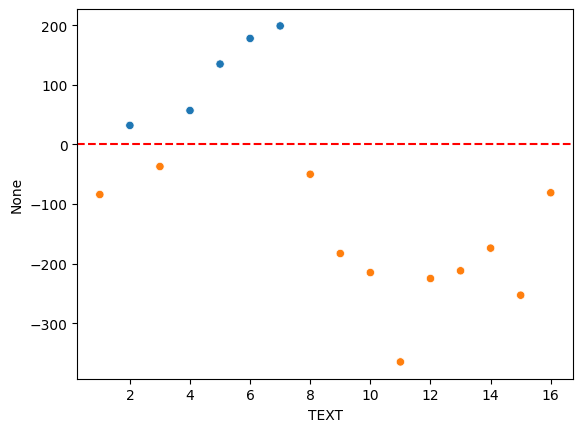

In [25]:
ax = sns.scatterplot(
    x=translat.index,
    y=(translat.Original - translat.Translation),
    hue=(translat.Original - translat.Translation < 0),
)
ax.axhline(0, color="red", linestyle="--")
ax.get_legend().remove()
plt.show()
sns.reset_defaults()

- Examine the differences with a QQ plot
- What is the mean difference in length between these source texts and their translations?
- Are these differences normally distributed?

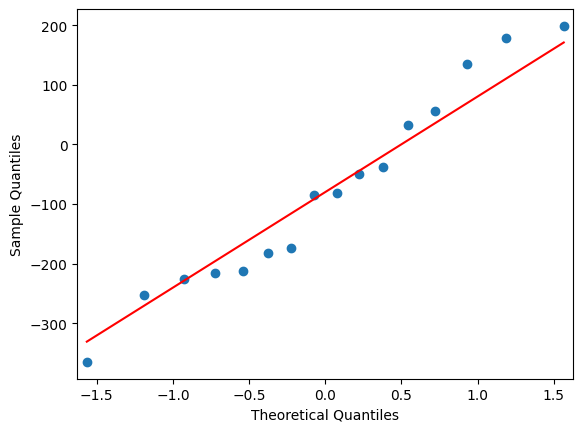

Mean Difference: -79.88
Shapiro-Wilk on differences: ShapiroResult(statistic=np.float64(0.9568761117156938), pvalue=np.float64(0.605649927578948))


In [26]:
diff = translat.Original - translat.Translation
sm.qqplot(diff, line="s")
plt.show()
print(f"Mean Difference: {diff.mean():.2f}")
print(f"Shapiro-Wilk on differences: {sp.stats.shapiro(diff)}")

> SOLUTION: The QQ plot looks OK, and Shapiro-Wilk gives us no reason to reject $H_0$, which is that the differences are distributed normally. On average, originals are 80 tokens shorter than translations.

Answer the following question, using the appropriate test, in its correct paired or unpaired variant and applying the correct directionality: Are the originals in this dataset statistically speaking shorter than their translated counterparts?

> SOLUTION: The subjects (texts) are independent (the translation of one text does not affect any others). The differences are normally distributed. The subjects are paired (each text has an original and a matching translation). The best choice is a paired $t$-test `sp.stats.ttest_rel()`. Since we suspect that the originals tend to be shorter (by looking at the data) we should perform a **one-tailed** test with the alternative hypothesis $H_1$ that the original lengths are "less" than the translations. The $p$-value is below the 0.05 threshold, giving us moderate evidence to reject $H_0$ in favour of the alternative hypothesis. 

In [27]:
sp.stats.ttest_rel(translat.Original, translat.Translation, alternative="less")

TtestResult(statistic=np.float64(-1.9278689246778542), pvalue=np.float64(0.036511458709388246), df=np.int64(15))

By the way, the non-parametric (paired) Wilcoxon test also works in this case, but it is not the best choice.

In [28]:
sp.stats.wilcoxon(translat.Original, translat.Translation, alternative="less")

WilcoxonResult(statistic=np.float64(32.0), pvalue=np.float64(0.0326995849609375))

If we perform a less stringent two-sided test, we lose just enough statistical "power" that the $p$-value is above the critical threshold. This underscores the importance of formulating clear hypotheses in advance!

In [29]:
sp.stats.ttest_rel(translat.Original, translat.Translation, alternative="two-sided")

TtestResult(statistic=np.float64(-1.9278689246778542), pvalue=np.float64(0.07302291741877649), df=np.int64(15))

```
Version History

Current: v1.0.0

26/9/24: 1.0.0: first draft, BN
04/10/24: 1.0.1: typos + proofreading, MK
```